# NEURAL NETWORK FROM SCRATCH

In [11]:
# create a set of functions that can build a neural net- basic perceptron 
# using a structure similar to tensorflow

In [145]:
# GOAL: create A GRAPH - a global variable with constants and operations that 
# can perform a basic classification

In [146]:
import numpy as np

In [154]:
## OPERATION CLASS

class Operation():
    
    def __init__(self,input_nodes = []):
        
        self.input_nodes = input_nodes
        
        self.output_nodes = []
        
        for node in input_nodes:
            
            node.output_nodes.append(self)
        
        _default_graph.operations.append(self)
        
    def compute(self): # just a place holder that is overwritten by the actual operations
        pass

In [155]:
# addition
class add(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
        
    def compute(self,x_var,y_var):
        self.inputs = [x_var,y_var]
        return x_var + y_var

In [156]:
# multiplication
class multiply(Operation):
    
    def __init__(self,x,y):
         super().__init__([x,y])
        
    def compute(self,x_var,y_var):
        self.inputs = [x_var,y_var]
        return x_var * y_var

In [263]:
# matrix multiplication
class matrixmultiply(Operation):
    
    def __init__(self,x,y):
         super().__init__([x,y])
        
    def compute(self,x_var,y_var):
        x_var = np.array(x_var)
        y_var = np.array(y_var)
        self.inputs = [x_var,y_var]
        return x_var.dot(y_var) # has to be numpy array

In [158]:
## PLACE HOLDER CLASS (this is the point that the perceptron will be classifying)

class Placeholder():
    
    def __init__(self):
        
        self.output_nodes = []
        
        _default_graph.placeholders.append(self)

In [159]:
## VARIABLE CLASS 

class Variable():
    
    def __init__(self,initial_value=None):
        
        self.value = initial_value
        self.output_nodes = []
        
        _default_graph.variables.append(self)
    

In [160]:
class GRAPH():
    
    def __init__(self):
        
        self.operations = []
        self.placeholders = []
        self.variables = []
    
    def set_as_default(self):
        
        # allows it to be accessed within other objects
        global _default_graph 
        _default_graph = self

CODE THE FOLLOWING PROBLEM USING THE NEW CLASSES

z = Ax + b

A = 10

b = 1

z = 10x + 1

In [189]:
g = GRAPH()

In [190]:
g.set_as_default()

In [191]:
A = Variable(10)
b = Variable(1)

In [192]:
x = Placeholder()

In [193]:
y = multiply(A,x)

In [194]:
z = add(y,b)

In [195]:
# nothing has been computed/executed so far (placeholder has not been set)

In [196]:
# ensure nodes are computed in the right order (i.e., multiplication first, addition second)
# tree traversal
def traverse_postorder(operation):
    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)

    recurse(operation)
    return nodes_postorder

In [197]:
# create a SESSION class

class Session():
    
    def run(self,operation,feed_dict={}):
        
        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:
            # check
            
            if type(node) == Placeholder:
                
                node.output = feed_dict[node]
                
            elif type(node) == Variable:
                
                node.output = node.value
                
            else:
                # operation
                node.inputs = [input_node.output for input_node in node.input_nodes]
                
                node.output = node.compute(*node.inputs) # asterics (args) allows variable lenght of the node.inputs
            
            if type(node.output) == list:
                node.ouptut = np.array(node.output)
                
        return operation.output

In [198]:
sess = Session()

In [199]:
result = sess.run(operation=z,feed_dict = {x:10})

In [200]:
result

101

In [201]:
g = GRAPH()
g.set_as_default()
A = Variable(np.array([[10,20],[30,40]]))
b = Variable([1,1])
x = Placeholder()
y = matrixmultiply(A,x)
z = add(y,b)

In [202]:
sess = Session()

In [203]:
sess.run(operation = z, feed_dict = {x:10})

array([[101, 201],
       [301, 401]])

# CLASSIFICATION

In [218]:
# Activation function
import matplotlib.pyplot as plt
%matplotlib inline

In [219]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

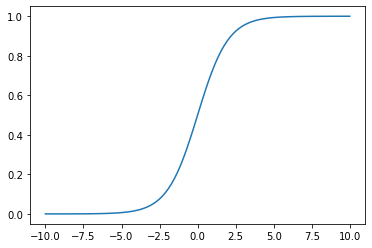

In [222]:
example_z = np.linspace(-10,10,100)
example_a = sigmoid(example_z)
plt.plot(example_z,example_a)

In [252]:
# turn the sigmoid function into an operation
class Sigmoid(Operation):
    
    def __init__(self,z):
         super().__init__([z])
        
    def compute(self,z_val):
        return 1/(1+np.exp(-z_val)) 

In [224]:
from sklearn.datasets import make_blobs

In [225]:
data = make_blobs(n_samples = 50,n_features = 2, centers = 2, random_state = 75)

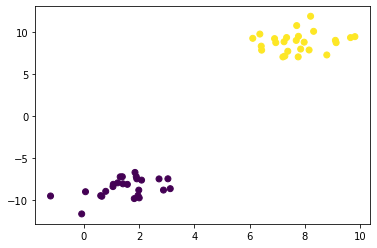

In [230]:
features = data[0]
labels = data[1]

plt.scatter(features[:,0],features[:,1],c=labels)

In [231]:
# create a separation line

In [291]:
x = np.linspace(0,11,10)
y = -x+5

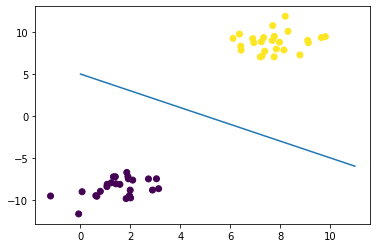

In [292]:
plt.scatter(features[:,0],features[:,1],c=labels)
plt.plot(x,y)

(1,1)* f - 5 = 0 # matrix representation of the line

if above zero, yellow class

if below zero, purple class

In [294]:
np.array([1,1]).dot(np.array([[8],[10]]))-5 # yellow point

array([13])

In [293]:
np.array([1,1]).dot(np.array([[-15],[10]]))-5 # purple point

array([-10])

In [265]:
g = GRAPH()
g.set_as_default()

In [266]:
x = Placeholder()

In [267]:
w = Variable([1,1])

In [268]:
b = Variable(-5)

In [269]:
z = add(matrixmultiply(w,x),b)

In [270]:
a = Sigmoid(z)

In [271]:
sess = Session()

In [272]:
sess.run(operation=a,feed_dict={x:[8,10]}) # yellow class

0.999997739675702

In [273]:
sess.run(operation=a,feed_dict={x:[2,-10]}) # purple class

2.2603242979035746e-06

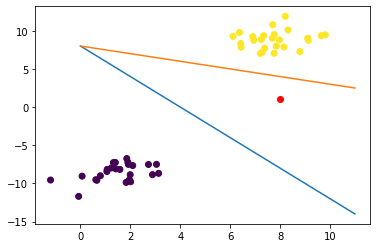

In [462]:
# changing the slope of the line and comparing results across two separation lines
x = np.linspace(0,11,10)
y1 = -2*x+8
y2 = -1/2*x+8
plt.scatter(features[:,0],features[:,1],c=labels)
plt.plot(x,y1)
plt.plot(x,y2)

# pick a point that would be assigned to a different class depending on the slope of the w
point2classify = [8,1]
plt.plot(point2classify[0],point2classify[1],'ro')

In [467]:
g = GRAPH()
g.set_as_default()
x = Placeholder()
w = Variable([2,1]) # slope is y over x (in this case y should double with respect to x)
b = Variable(-8)
z = add(matrixmultiply(w,x),b)
a = Sigmoid(z)
sess = Session()
sess.run(operation=a,feed_dict={x:point2classify}) 

0.9998766054240137

In [471]:
np.array([2,1]).dot(point2classify)-8 # yellow point

9

In [472]:
g = GRAPH()
g.set_as_default()
x = Placeholder()
w = Variable([1/2,1])
b = Variable(-8)
z = add(matrixmultiply(w,x),b)
a = Sigmoid(z)
sess = Session()
sess.run(operation=a,feed_dict={x:point2classify}) 

0.04742587317756678

In [473]:
np.array([1/2,1]).dot(point2classify)-8 # yellow point

-3.0